# Sprint 9 - Proyecto

**Descripción del proyecto**

Lo has hecho de maravilla en el curso de TripleTen y te han ofrecido hacer prácticas en el departamento de analítica de Showz, una empresa de venta de entradas de eventos. Tu primera tarea es ayudar a optimizar los gastos de marketing. 

Cuentas con:

* registros del servidor con datos sobre las visitas a Showz desde enero de 2017 hasta diciembre de 2018;
* un archivo con los pedidos en este periodo;
* estadísticas de gastos de marketing.

Lo que vas a investigar: 

* cómo los clientes usan el servicio;
* cuándo empiezan a comprar;
* cuánto dinero aporta cada cliente a la compañía;
* cuándo los ingresos cubren el costo de adquisición de los clientes.

## Inicialización

In [2]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

## Cargar datos

In [3]:
# Cargar los archivos
df_visits_log = pd.read_csv("/datasets/visits_log_us.csv")
df_ordes_log = pd.read_csv("/datasets/orders_log_us.csv")
df_costs = pd.read_csv("/datasets/costs_us.csv")

## Información General 

In [4]:
# Información general/resumida sobre el DataFrame:
df_visits_log.info()
df_ordes_log.info()
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 

In [5]:
# Muestra de los datos 
print("Información  del Dtaframe: visits_log")
df_visits_log.columns = df_visits_log.columns.str.replace(' ', '_').str.lower()
df_visits_log.head()

Información  del Dtaframe: visits_log


,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [6]:
# Muestra de los datos 
print("Información  del Dtaframe: ordes_log")
df_ordes_log.columns = df_ordes_log.columns.str.replace(' ', '_').str.lower()
df_ordes_log.head()

Información  del Dtaframe: ordes_log


,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [7]:
# Muestra de los datos 
print("Información  del Dtaframe: costs")
df_costs.head()

Información  del Dtaframe: costs


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [8]:
# Valores ausentes
print("Número de valores ausentes: visits_log ", df_visits_log.isna().sum())

Número de valores ausentes: visits_log  device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64


In [9]:
# Valores ausentes
print("Número de valores ausentes: ordes_log ", df_ordes_log.isna().sum())

Número de valores ausentes: ordes_log  buy_ts     0
revenue    0
uid        0
dtype: int64


In [10]:
# Valores ausentes
print("Número de valores ausentes: df_costs ", df_costs.isna().sum())

Número de valores ausentes: df_costs  source_id    0
dt           0
costs        0
dtype: int64


In [11]:
# Valores duplicados
print("Número de valores duplicados: visits_log", df_visits_log.duplicated().sum())
print("Número de valores duplicados: ordes_log", df_ordes_log.duplicated().sum())
print("Número de valores duplicados: df_costs", df_costs.duplicated().sum())

Número de valores duplicados: visits_log 0
Número de valores duplicados: ordes_log 0
Número de valores duplicados: df_costs 0


<div class="alert alert-block alert-info">
De acuerdo con la informacion obtenida estos DF se observa que:
    
* Tienen columnas de tipo float, object y entero.
* Las tablas visits y orders tenian titulos en mayuscula y sin espacio, por lo tanto se modificaron.
* No tiene valores ausentes.
* No tiene valores duplicados
</div>

## Informes y métricas 

### Visitas:

#### Usuarios por dia, semana y mes.

In [12]:
# ¿Cuántas personas lo usan cada día, semana y mes?

# Convertir las columnas de tiempo a tipo datetime
df_visits_log['start_ts'] = pd.to_datetime(df_visits_log['start_ts'])
df_visits_log['end_ts'] = pd.to_datetime(df_visits_log['end_ts'])

# Crear columnas de fecha para día, semana y mes
df_visits_log['Day'] = df_visits_log['start_ts'].dt.date
df_visits_log['Week'] = df_visits_log['start_ts'].dt.to_period('W').apply(lambda r: r.start_time)
df_visits_log['Month'] = df_visits_log['start_ts'].dt.to_period('M').apply(lambda r: r.start_time)

# Calcular usuarios únicos por día, semana y mes
daily_users = df_visits_log.groupby('Day')['uid'].nunique()
weekly_users = df_visits_log.groupby('Week')['uid'].nunique()
monthly_users = df_visits_log.groupby('Month')['uid'].nunique()

# Mostrar las métricas
print("Usuarios únicos por día:")
print(daily_users)
print("\nUsuarios únicos por semana:")
print(weekly_users)
print("\nUsuarios únicos por mes:")
print(monthly_users)

Usuarios únicos por día:
Day
2017-06-01     605
2017-06-02     608
2017-06-03     445
2017-06-04     476
2017-06-05     820
              ... 
2018-05-27     620
2018-05-28    1039
2018-05-29     948
2018-05-30    1289
2018-05-31    1997
Name: uid, Length: 364, dtype: int64

Usuarios únicos por semana:
Week
2017-05-29     2021
2017-06-05     4129
2017-06-12     2812
2017-06-19     2878
2017-06-26     3064
2017-07-03     3294
2017-07-10     4355
2017-07-17     3841
2017-07-24     2655
2017-07-31     2364
2017-08-07     2444
2017-08-14     2746
2017-08-21     3116
2017-08-28     3694
2017-09-04     4412
2017-09-11     4319
2017-09-18     4874
2017-09-25     6241
2017-10-02     7612
2017-10-09     7074
2017-10-16     7148
2017-10-23     7401
2017-10-30     7480
2017-11-06     7179
2017-11-13     8117
2017-11-20    10586
2017-11-27     8166
2017-12-04     8407
2017-12-11     8214
2017-12-18     7172
2017-12-25     7774
2018-01-01     6918
2018-01-08     6703
2018-01-15     6972
2018-01-22 

#### Sesiones por dia

In [13]:
# ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).

# Crear una nueva columna para extraer solo la fecha (sin hora)
df_visits_log['Session Date'] = df_visits_log['start_ts'].dt.date

# Contar el número de sesiones por fecha
sessions_per_day = df_visits_log.groupby('Session Date').size()

# Mostrar el número de sesiones por día
print("Número de sesiones por día:", sessions_per_day)

Número de sesiones por día: Session Date
2017-06-01     664
2017-06-02     658
2017-06-03     477
2017-06-04     510
2017-06-05     893
              ... 
2018-05-27     672
2018-05-28    1156
2018-05-29    1035
2018-05-30    1410
2018-05-31    2256
Length: 364, dtype: int64


#### Duración de cada sesión

0         1080
1         1680
2            0
3         1440
4            0
          ... 
359395      19
359396      19
359397      19
359398      19
359399      19
Name: session_duration_sec, Length: 359400, dtype: int64


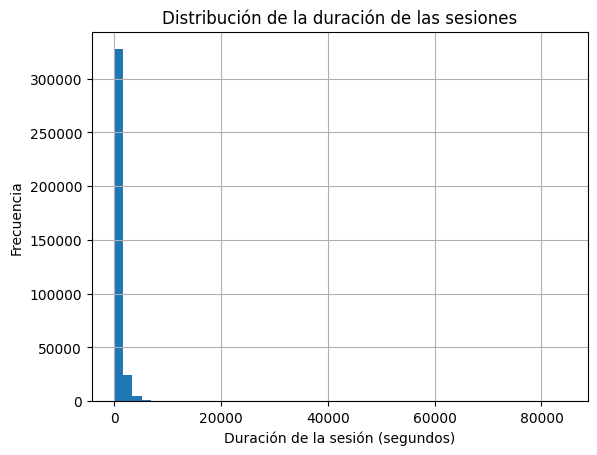

In [14]:
# ¿Cuál es la duración de cada sesión?
df_visits_log['session_duration_sec'] = (df_visits_log['end_ts'] - df_visits_log['start_ts']).dt.seconds
print(df_visits_log['session_duration_sec'])

df_visits_log['session_duration_sec'].hist(bins=50)
plt.xlabel('Duración de la sesión (segundos)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la duración de las sesiones')

# Mostrar el gráfico
plt.show()

#### Frecuencia de regreso

In [15]:

df_visits_log['start_ts'] = pd.to_datetime(df_visits_log['start_ts'], format= "%Y-%m-%d %H:%M")
df_visits_log['end_ts'] = pd.to_datetime(df_visits_log['end_ts'], format= "%Y-%m-%d %H:%M")

df_visits_log['session_year'] = df_visits_log['start_ts'].dt.isocalendar().year
df_visits_log['session_month'] = df_visits_log['start_ts'].dt.month
df_visits_log['session_week'] = df_visits_log['start_ts'].dt.isocalendar().week
df_visits_log['session_date'] = df_visits_log['start_ts'].dt.date

mau_total = (
    df_visits_log.groupby(['session_year', 'session_month'])
    .agg({'uid': 'nunique'})
    .mean()
)
dau_total = df_visits_log.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = df_visits_log.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()

sticky_wau = (dau_total / wau_total) * 100
sticky_mau = (dau_total / mau_total) * 100

print(sticky_wau)
print(sticky_mau)

uid    15.884409
dtype: float64
uid    3.90897
dtype: float64


In [16]:
# Calcular la frecuencia de retorno para cada usuario
df_visits_sorted = df_visits_log.sort_values(by=['uid', 'start_ts'])
df_visits_sorted['prev_visit'] = df_visits_sorted.groupby('uid')['start_ts'].shift(1)
df_visits_sorted['days_since_last'] = (df_visits_sorted['start_ts'] - df_visits_sorted['prev_visit']).dt.days

print(df_visits_sorted[['uid', 'start_ts', 'prev_visit', 'days_since_last']].head(10))

                    uid            start_ts          prev_visit  \
196543   11863502262781 2018-03-01 17:27:00                 NaT   
257333   49537067089222 2018-02-06 15:55:00                 NaT   
173818  297729379853735 2017-06-07 18:47:00                 NaT   
173142  313578113262317 2017-09-18 22:49:00                 NaT   
192554  313578113262317 2018-02-18 15:17:00 2017-09-18 22:49:00   
113873  313578113262317 2018-03-11 17:23:00 2018-02-18 15:17:00   
34588   325320750514679 2017-09-30 14:29:00                 NaT   
41778   325320750514679 2018-02-26 12:33:00 2017-09-30 14:29:00   
188450  397399764396656 2018-01-18 12:32:00                 NaT   
183750  407573351275847 2017-06-17 13:40:00                 NaT   

        days_since_last  
196543              NaN  
257333              NaN  
173818              NaN  
173142              NaN  
192554            152.0  
113873             21.0  
34588               NaN  
41778             148.0  
188450              NaN  
18

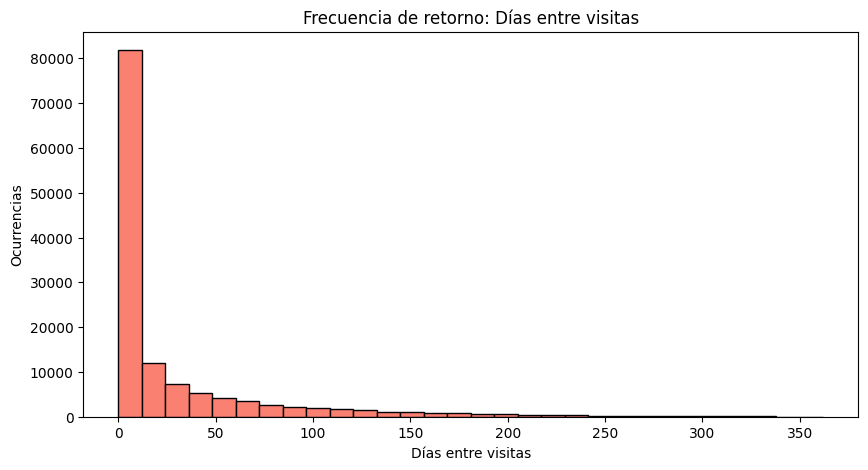

In [20]:
# Histograma de días entre visitas (sin valores nulos)
plt.figure(figsize=(10, 5))
plt.hist(df_visits_sorted['days_since_last'].dropna(), bins=30, color='salmon', edgecolor='black')
plt.title('Frecuencia de retorno: Días entre visitas')
plt.xlabel('Días entre visitas')
plt.ylabel('Ocurrencias')
plt.show()

<div class="alert alert-block alert-info">
De acuerdo con la informacion trabajada se hicieron los siguientes calculos:
    
* Usuarios por dia, semana y mes.
* Sesiones por dia.
* Duracion de cada sesion.
* Frecuencia de regreso con un sticky_wau = 15.88% y sticky_mau = 3.90%
    
</div>

### Ventas:

In [24]:
# ¿Cuándo empieza la gente a comprar?

# Convertir las columnas de tiempo a datetime
df_visits_log['start_ts'] = pd.to_datetime(df_visits_log['start_ts'])
df_ordes_log['buy_ts'] = pd.to_datetime(df_ordes_log['buy_ts'])

# Fusionar los DataFrames por 'uid' para obtener las columnas necesarias
df_merged = pd.merge(df_visits_log[['uid', 'start_ts']], df_ordes_log[['uid', 'buy_ts']], on='uid', how='inner')

# Calcular el tiempo entre registro y primera compra en días
df_merged['conversion_time_days'] = (df_merged['buy_ts'] - df_merged['start_ts']).dt.days

# Categorizar conversiones (Conversion 0d, Conversion 1d, etc.)
df_merged['conversion_category'] = df_merged['conversion_time_days'].apply(lambda x: f'Conversion {x}d' if x >= 0 else 'No Conversion')

# Mostrar las primeras filas para verificar
print(df_merged.head(10))

                    uid            start_ts              buy_ts  \
0  16174680259334210214 2018-05-20 10:59:00 2018-03-09 20:25:00   
1  16174680259334210214 2018-03-09 20:05:00 2018-03-09 20:25:00   
2  16007536194108375387 2017-09-03 21:35:00 2017-09-04 12:46:00   
3  16007536194108375387 2017-09-03 21:35:00 2017-10-28 00:01:00   
4  16007536194108375387 2017-09-03 21:35:00 2017-10-28 19:16:00   
5  16007536194108375387 2017-10-27 15:20:00 2017-09-04 12:46:00   
6  16007536194108375387 2017-10-27 15:20:00 2017-10-28 00:01:00   
7  16007536194108375387 2017-10-27 15:20:00 2017-10-28 19:16:00   
8  16007536194108375387 2017-09-04 17:37:00 2017-09-04 12:46:00   
9  16007536194108375387 2017-09-04 17:37:00 2017-10-28 00:01:00   

   conversion_time_days conversion_category  
0                   -72       No Conversion  
1                     0       Conversion 0d  
2                     0       Conversion 0d  
3                    54      Conversion 54d  
4                    54      Con

In [23]:
# Extraer la primera visita (registro) de cada usuario
first_visit = df_visits_log.groupby('uid')['start_ts'].min().reset_index().rename(columns={'start_ts': 'first_visit'})

# Extraer el primer pedido de cada usuario
first_order = df_ordes_log.groupby('uid')['buy_ts'].min().reset_index().rename(columns={'buy_ts': 'first_order'})

# Unir ambas tablas para calcular el tiempo hasta conversión
conversion = pd.merge(first_visit, first_order, on='uid', how='inner')
conversion['conversion_days'] = (conversion['first_order'] - conversion['first_visit']).dt.days

print("Tiempo hasta la conversión (días) para algunos usuarios:")
display(conversion[['uid', 'first_visit', 'first_order', 'conversion_days']].head(10))

Tiempo hasta la conversión (días) para algunos usuarios:


,uid,first_visit,first_order,conversion_days
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0
5,3077748354309989,2018-03-03 12:08:00,2018-03-03 12:33:00,0
6,3605148382144603,2017-08-15 21:54:00,2017-09-21 20:56:00,36
7,3753586865891862,2018-03-03 13:47:00,2018-03-03 13:50:00,0
8,4808417689019433,2018-01-09 23:10:00,2018-01-09 23:32:00,0
9,4992223027560440,2018-04-04 13:54:00,2018-04-04 13:54:00,0


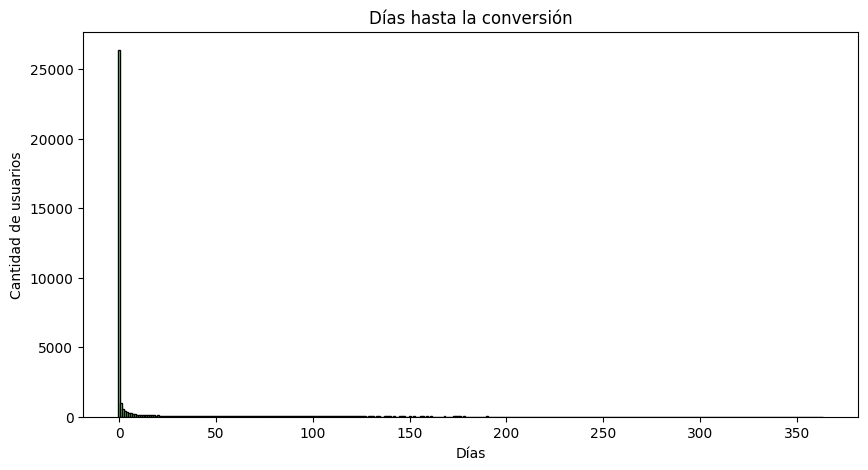

In [25]:
# Histograma de los días hasta la conversión
plt.figure(figsize=(10, 5))
plt.hist(conversion['conversion_days'], bins=range(0, conversion['conversion_days'].max()+2), color='lightgreen', edgecolor='black', align='left')
plt.title('Días hasta la conversión')
plt.xlabel('Días')
plt.ylabel('Cantidad de usuarios')
plt.show()

#### Pedidos

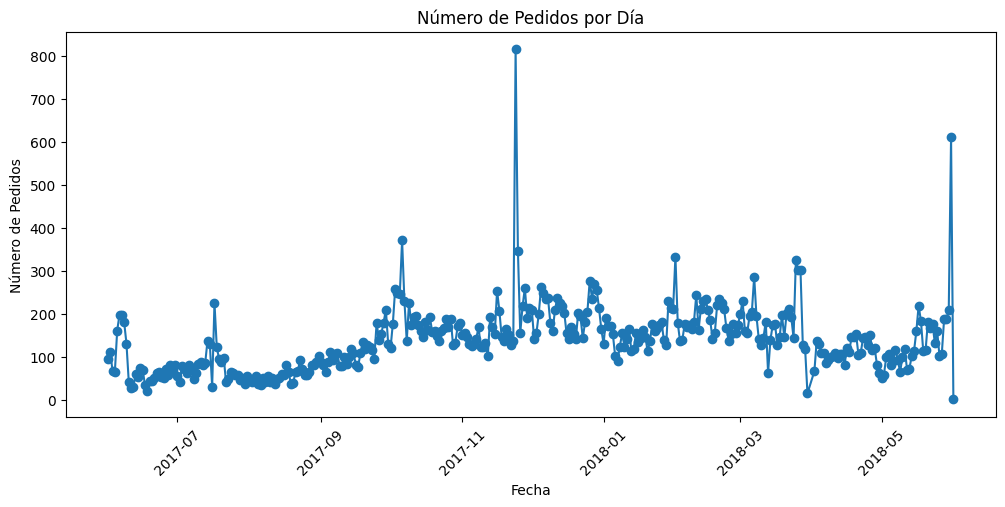

In [27]:
# Pedidos por día
df_ordes_log['order_date'] = df_ordes_log['buy_ts'].dt.date
orders_per_day = df_ordes_log.groupby('order_date').size()

plt.figure(figsize=(12, 5))
orders_per_day.plot(kind='line', marker='o')
plt.title('Número de Pedidos por Día')
plt.xlabel('Fecha')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=45)
plt.show()

In [18]:
# ¿Cuántos pedidos hacen durante un período de tiempo dado?
# Establecer el período deseado
start_date = "2018-01-01"
end_date = "2018-06-30"

# Filtrar los pedidos dentro del período especificado
filtered_orders = df_ordes_log[
    (df_ordes_log['buy_ts'] >= start_date) & 
    (df_ordes_log['buy_ts'] <= end_date)
]

# Contar la cantidad de pedidos en el período dado
order_count = len(filtered_orders)

# Mostrar el resultado
print(f"Número de pedidos entre {start_date} y {end_date}: {order_count}")

Número de pedidos entre 2018-01-01 y 2018-06-30: 22948


#### Promedio de compra

In [29]:
# Calcular el tamaño promedio de compra
average_purchase = filtered_orders['revenue'].mean()

# Mostrar el resultado
print(f"El tamaño promedio de compra es: {average_purchase}")

El tamaño promedio de compra es: 4.8548771134739415


#### LTV

In [30]:
# ¿Cuánto dinero traen? (LTV)

# Calcular ingreso promedio por compra (ARPU)
arpu = df_ordes_log['revenue'].mean()

# Calcular frecuencia promedio de compras por cliente
purchase_frequency = df_ordes_log.groupby('uid').size().mean()

# Calcular duración promedio de la relación (en años)
df_ordes_log['relationship_duration_days'] = (
    df_ordes_log.groupby('uid')['buy_ts'].transform('max') -
    df_visits_log.groupby('uid')['start_ts'].transform('min')
).dt.days

average_relationship_duration_years = df_ordes_log['relationship_duration_days'].mean() / 365

# Calcular el LTV
ltv = arpu * purchase_frequency * average_relationship_duration_years

# Mostrar el resultado
print(f"El Valor del Tiempo de Vida del Cliente (LTV) es: {ltv}")

El Valor del Tiempo de Vida del Cliente (LTV) es: 0.982577688037217


In [31]:
# Lifetime Value (LTV) por usuario
ltv_per_user = df_ordes_log.groupby('uid')['revenue'].sum()
print("Ejemplo de LTV por usuario:")
display(ltv_per_user.head(10))

Ejemplo de LTV por usuario:


uid
313578113262317      0.55
1575281904278712     3.05
2429014661409475    73.33
2464366381792757     2.44
2551852515556206    10.99
3077748354309989     4.67
3605148382144603     0.69
3753586865891862     3.50
4808417689019433     1.22
4992223027560440     3.05
Name: revenue, dtype: float64

### Marketing

#### ¿Cuánto dinero se gastó?

In [32]:
# Convertir la columna 'dt' a formato datetime
df_costs['dt'] = pd.to_datetime(df_costs['dt'])

# Calcular el gasto total en marketing
total_spent = df_costs['costs'].sum()

# Calcular el gasto por fuente de adquisición
costs_by_source = df_costs.groupby('source_id')['costs'].sum()

# Calcular el gasto a lo largo del tiempo (por mes)
costs_over_time = df_costs.groupby(df_costs['dt'].dt.to_period('M'))['costs'].sum()

# Mostrar los resultados
print(f"Gasto total en marketing: {total_spent}")
print("\nGasto por fuente de adquisición:")
print(costs_by_source)
print("\nGasto mensual:")
print(costs_over_time)

Gasto total en marketing: 329131.62

Gasto por fuente de adquisición:
source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

Gasto mensual:
dt
2017-06    18015.00
2017-07    18240.59
2017-08    14790.54
2017-09    24368.91
2017-10    36322.88
2017-11    37907.88
2017-12    38315.35
2018-01    33518.52
2018-02    32723.03
2018-03    30415.27
2018-04    22289.38
2018-05    22224.27
Freq: M, Name: costs, dtype: float64


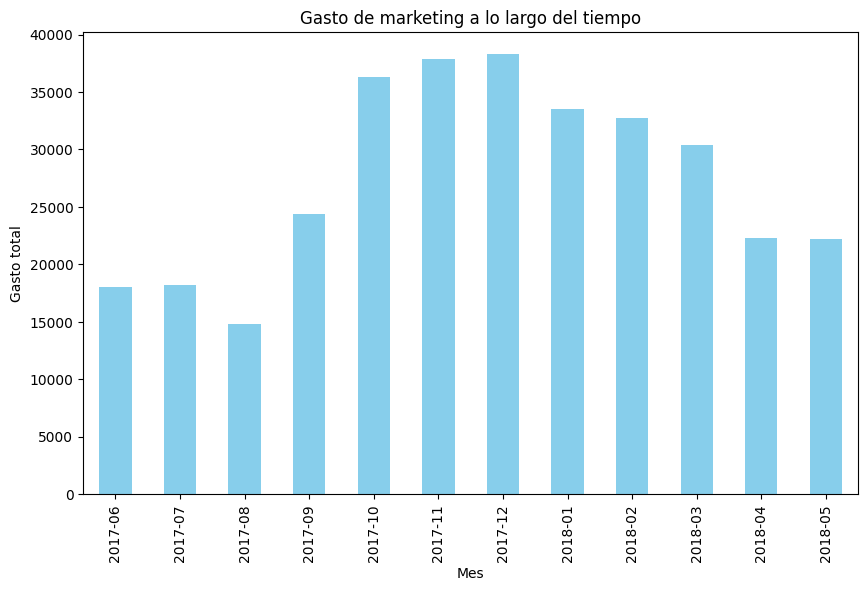

In [33]:
import matplotlib.pyplot as plt

# Graficar el gasto mensual
costs_over_time.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Gasto de marketing a lo largo del tiempo')
plt.xlabel('Mes')
plt.ylabel('Gasto total')
plt.show()

#### Costo de adquisición de clientes

In [34]:
# Calcular el gasto total por fuente de adquisición
costs_by_source = df_costs.groupby('source_id')['costs'].sum()

# Calcular el número de clientes únicos adquiridos por cada fuente
customers_by_source = df_visits_log.groupby('source_id')['uid'].nunique()

# Calcular el CAC para cada fuente
cac_by_source = costs_by_source / customers_by_source

# Mostrar el resultado
print("Costo de adquisición de clientes por fuente:")
print(cac_by_source)

Costo de adquisición de clientes por fuente:
source_id
1     1.096546
2     1.631017
3     1.890439
4     0.731201
5     0.908434
6          NaN
7          NaN
9     0.595584
10    0.721766
dtype: float64


In [35]:
# Fuente que atrajo más clientes
top_source = customers_by_source.idxmax()  # Fuente con el máximo número de clientes
max_customers = customers_by_source.max()  # Número máximo de clientes

# Mostrar los resultados
print(f"La fuente que atrajo más clientes es: {top_source}")
print(f"Con un total de {max_customers} clientes únicos adquiridos.")

La fuente que atrajo más clientes es: 4
Con un total de 83525 clientes únicos adquiridos.


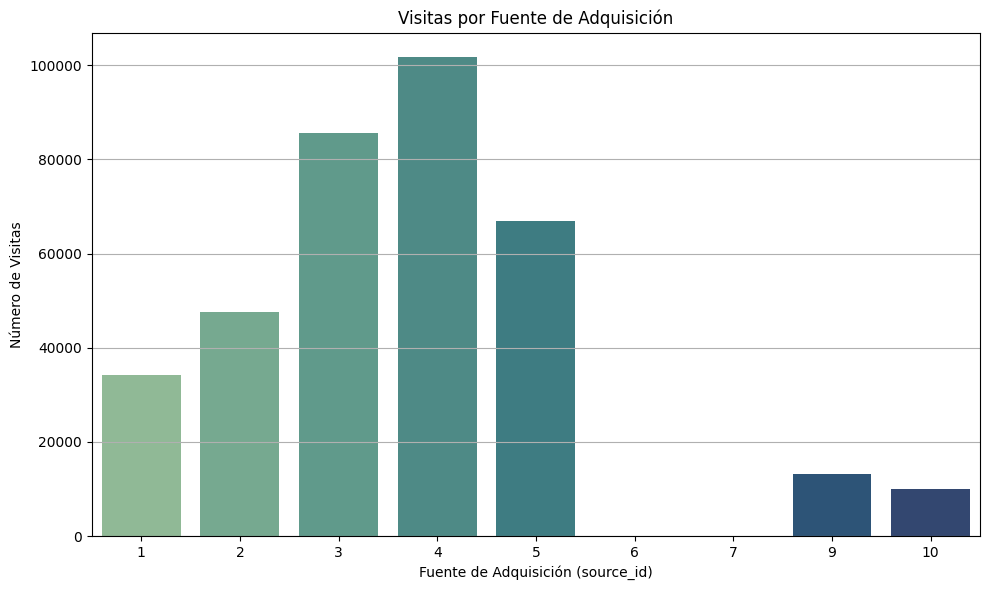

In [36]:
# Número total de visitas por fuente
visits_by_source = df_visits_log.groupby('source_id')['uid'].count()

plt.figure(figsize=(10, 6))
sns.barplot(x=visits_by_source.index, y=visits_by_source.values, palette="crest")
plt.title("Visitas por Fuente de Adquisición")
plt.xlabel("Fuente de Adquisición (source_id)")
plt.ylabel("Número de Visitas")
plt.xticks(rotation=0) 
plt.grid(axis='y')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### ROMI

In [37]:
df_ordes_log['order_month'] = df_ordes_log['buy_ts'].astype('datetime64[M]')
df_costs['month'] = df_costs['dt'].astype('datetime64[M]')

first_orders = df_ordes_log.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']

cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

print(cohort_sizes.head(12))

   first_order_month  n_buyers
0         2017-06-01      2023
1         2017-07-01      1923
2         2017-08-01      1370
3         2017-09-01      2581
4         2017-10-01      4340
5         2017-11-01      4081
6         2017-12-01      4383
7         2018-01-01      3373
8         2018-02-01      3651
9         2018-03-01      3533
10        2018-04-01      2276
11        2018-05-01      2988


In [46]:
### Cálculo del ROMI (Return on Marketing Investment)

user_source = df_visits_log.sort_values(by='start_ts').groupby('uid').first().reset_index()[['uid', 'source_id']]

# Asociar órdenes con la fuente de adquisición (utilizando la fuente del primer registro)
orders_with_source = pd.merge(df_ordes_log, user_source, on='uid', how='left')

# Ingresos por fuente
revenue_by_source = orders_with_source.groupby('source_id')['revenue'].sum()

# Calcular ROMI: (ingresos - gasto) / gasto
romi = (revenue_by_source - costs_by_source) / costs_by_source
print("ROMI por fuente de adquisición:", romi)

ROMI por fuente de adquisición: source_id
1     0.492351
2     0.096191
3    -0.614275
4    -0.071664
5     0.016750
7          NaN
9     0.043844
10   -0.235665
dtype: float64


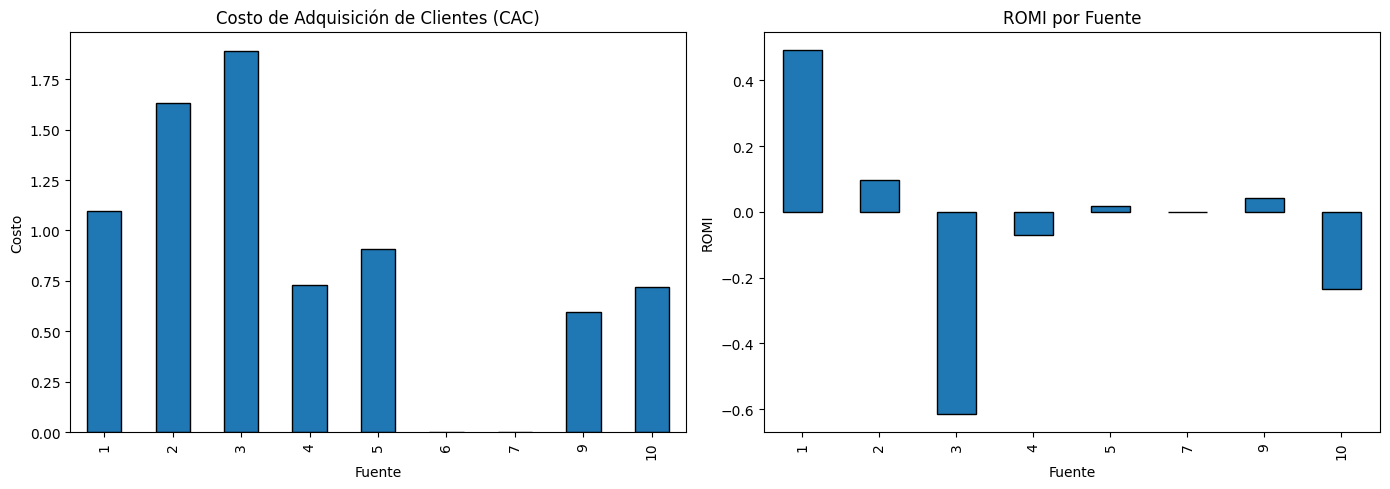

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

cac_by_source.plot(kind='bar', ax=ax[0], edgecolor='black')
ax[0].set_title('Costo de Adquisición de Clientes (CAC)')
ax[0].set_xlabel('Fuente')
ax[0].set_ylabel('Costo')

romi.plot(kind='bar', ax=ax[1], edgecolor='black')
ax[1].set_title('ROMI por Fuente')
ax[1].set_xlabel('Fuente')
ax[1].set_ylabel('ROMI')

plt.tight_layout()
plt.show()

In [38]:
df_ordes_log['order_month'] = df_ordes_log['buy_ts'].astype('datetime64[M]')
df_costs['month'] = df_costs['dt'].astype('datetime64[M]')

first_orders = df_ordes_log.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']

cohort_sizes = (
    first_orders.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_order_month', 'n_buyers']

margin_rate = 0.4

df_ordes_log = pd.merge(df_ordes_log, first_orders, on='uid')
cohorts = (
    df_ordes_log.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

report['gp'] = report['revenue'] * margin_rate
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report['ltv'] = report['gp'] / report['n_buyers']

result = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
).round()


result = result.fillna('')

# calcula los costos mensuales
monthly_costs = df_costs.groupby('month').sum()
# agrega los costos mensuales al informe de la cohorte
report_ = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
# calcula el CAC
report_['cac'] = report_['costs'] / report_['n_buyers']
 #calcula el ROMI
report_['romi'] = report_['romi'] = report_['ltv'] / report_['cac']
# crea una nueva tabla dinámica
output = report_.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean')

output.cumsum(axis=1).round(2)

print(output.cumsum(axis=1).round(2).fillna(''))

age                  0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06-01         0.21  0.23  0.25   0.3  0.34  0.38  0.42  0.44  0.47   0.5   
2017-07-01         0.25  0.27  0.29  0.31  0.32  0.32  0.33  0.33  0.34  0.35   
2017-08-01         0.20  0.21  0.23  0.24  0.26  0.27  0.28   0.3  0.31  0.31   
2017-09-01         0.24  0.29  0.31  0.48  0.49  0.52  0.55  0.56  0.57         
2017-10-01         0.24  0.26  0.27  0.28  0.29  0.29   0.3   0.3               
2017-11-01         0.22  0.24  0.25  0.26  0.27  0.27  0.28                     
2017-12-01         0.22  0.23  0.27  0.32  0.33  0.35                           
2018-01-01         0.17  0.18  0.19   0.2   0.2                                 
2018-02-01         0.19   0.2   0.2   0.2                                       
2018-03-01         0.22  0.24  0.25                                             
2018-04-01         0.19  0.2

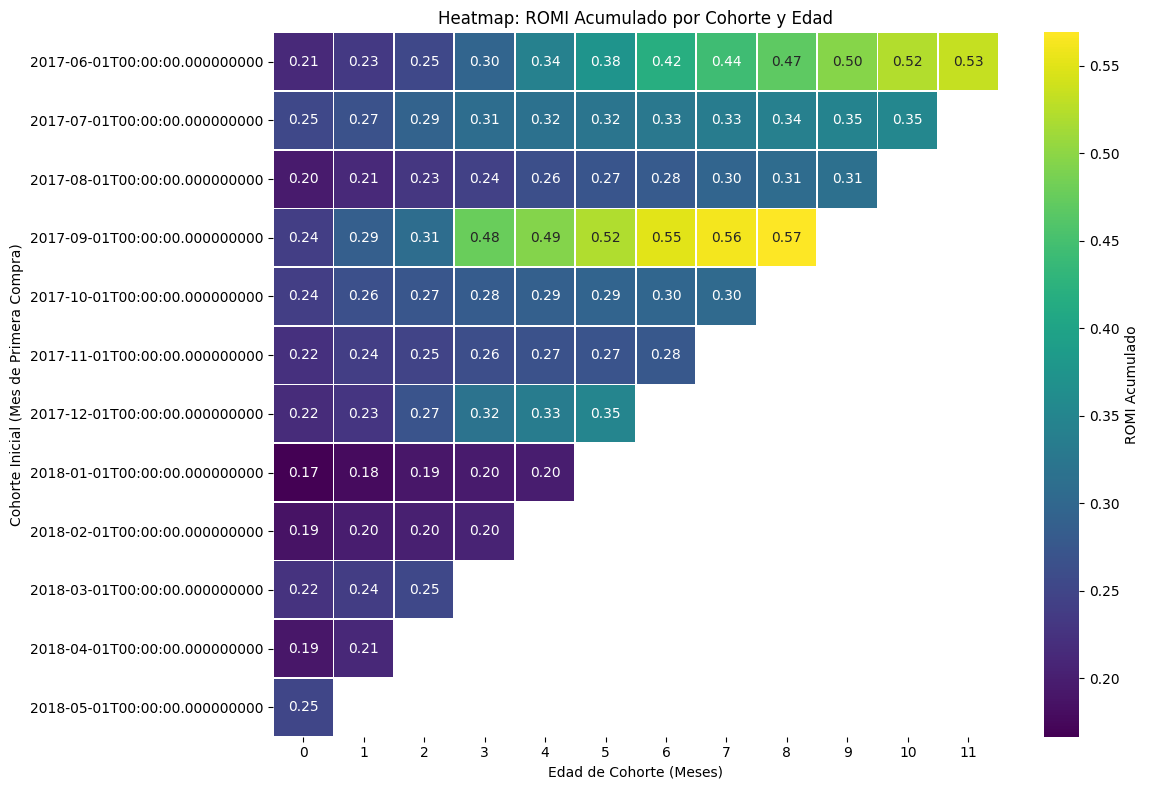

In [39]:
heatmap_data = output.cumsum(axis=1).replace('', np.nan).astype(float)

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,  
    annot=True,    
    fmt=".2f",     
    cmap="viridis",  
    linewidths=0.5,  
    cbar_kws={'label': 'ROMI Acumulado'}
)

plt.title("Heatmap: ROMI Acumulado por Cohorte y Edad")
plt.xlabel("Edad de Cohorte (Meses)")
plt.ylabel("Cohorte Inicial (Mes de Primera Compra)")
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### Conclusion 

<div class="alert alert-block alert-info">
   
 De acuerdo a el analisis obtenido se recomienda:
    
* Asignar presupuesto prioritario a las fuentes que muestran el ROMI más alto consistentemente a lo largo del tiempo.
* Se recomienda la fuente # 4 ya que es la que mas trae visitas online a la tienda.
* La fuente 4 muestra un buen desempeno en el CAC lo que indica que es rentable.
* Para las fuentes 2 y 3 se puede puede identificar como las menos rentable debido a los costos tan altos.
* En la grafica podemos ver que la cohorte de Sept 2017 destaca con buenas ventas a partir del cuarto mes y puede estar relacionado con la campaña de marketing que se ejecuto en ese periodo.
* El ROMI va creciendo con la edad lo que indica que los clientes con el tiempo tienden a comprar mas.
* Con los datos anteriores se puede evaluar nuevas estrategias de marketing para retener a los clientes y atraer a nuevos.
    
</div>